In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/region-ranking/RegionRanking_Kaggle.xlsx


In [2]:
df = pd.read_excel("/kaggle/input/region-ranking/RegionRanking_Kaggle.xlsx")
df

,Priority Countries,Regional Weighted Score,Absolute Scaled Score,Population,Priority Score,Burden of Malnutrition Ranking,Percentile Rank in Political Stability and Absence of Violence/Terrorism (PV),Percentile Rank in Government Effectiveness,Percentile Rank in Regulatory Quality,Weighted Governance Score(A),Governance Ranking,Average DAC funding to Basic Health (US mn),Percentile rank in Average DAC funding to Basic Health,Net ODA received(% of GNI),Percentile rank in Net ODA received(% of GNI),Net ODA received (US mn),Share of Basic Health in ODA (%),Percentile rank in Share of Basic Health in ODA (%),Donor Alignment Score (A),Donor Alignment Ranking
0,India,2.85,0.95,1450935791,1378389001,1,21.33,67.92,47.17,51.0850,6,119.18,95.7,0.0858,13.0,5524.13,2.16,4.3,43.47,17
1,Pakistan,2.25,0.75,251269164,188451873,2,6.64,30.66,19.81,21.9425,18,53.90,78.3,0.4981,21.7,608.67,8.86,78.3,61.32,5
2,Yemen,2.10,0.70,40583164,28408215,6,0.95,0.47,3.30,1.2975,24,44.38,65.2,38.0321,95.7,392.56,11.31,91.3,82.18,19
3,Afghanistan,1.95,0.65,42647492,27720870,7,1.42,1.42,9.43,3.4225,22,120.08,100.0,26.7757,87.0,909.76,13.20,95.7,94.81,13
4,Papua New Guinea,1.95,0.65,10576502,6874726,14,27.01,22.17,27.83,24.7950,15,33.53,60.9,2.2195,39.1,507.71,6.60,56.5,53.04,20
5,Bangladesh,1.90,0.63,173562364,109922831,4,15.64,26.89,18.87,22.0725,17,92.75,91.3,1.0855,26.1,2952.83,3.14,26.1,52.18,2
6,Lao People’s Democratic Republic (Laos),1.70,0.57,7769819,4402897,15,75.36,28.30,17.92,37.4700,10,18.56,39.1,3.8273,47.8,378.65,4.90,39.1,41.71,4
7,Cambodia,1.65,0.55,17638801,9701341,11,47.87,38.21,25.47,37.4400,11,46.20,73.9,4.0239,52.2,790.80,5.84,47.8,59.56,24
8,Nepal,1.60,0.53,29651054,15813895,10,39.34,21.70,27.36,27.5250,14,30.70,52.2,2.9169,43.5,415.21,7.39,69.6,54.81,8
9,Indonesia,1.50,0.50,283487931,141743966,3,28.91,69.81,60.85,57.3450,5,58.51,82.6,0.0516,8.7,2427.55,2.41,17.4,40.87,6


In [3]:
df.columns

Index(['Priority Countries', 'Regional Weighted Score',
       'Absolute Scaled Score', 'Population', 'Priority Score',
       'Burden of Malnutrition Ranking',
       'Percentile Rank in Political Stability and Absence of Violence/Terrorism (PV)',
       'Percentile Rank in Government Effectiveness',
       'Percentile Rank in Regulatory Quality', 'Weighted Governance Score(A)',
       'Governance Ranking', 'Average DAC funding to Basic Health (US mn)',
       'Percentile rank in Average DAC funding to Basic Health',
       'Net ODA received(% of GNI)',
       'Percentile rank in Net ODA received(% of GNI)',
       'Net ODA received (US mn)', 'Share of Basic Health in ODA (%)',
       'Percentile rank in Share of Basic Health in ODA (%)',
       'Donor Alignment Score (A)', 'Donor Alignment Ranking'],
      dtype='object')

In [4]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_36/2683981981.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


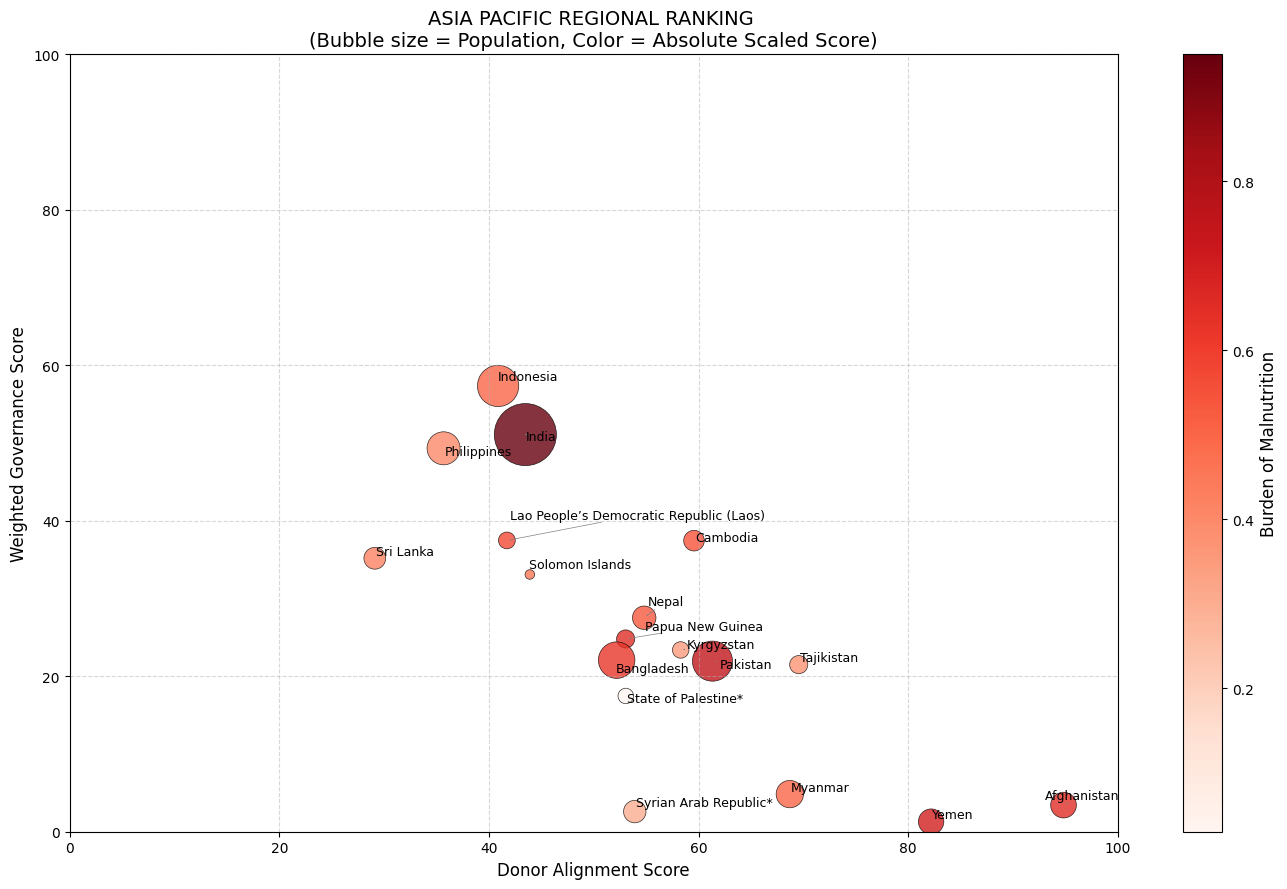

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from adjustText import adjust_text
import numpy as np

# --- Normalize bubble sizes ---
max_pop = df["Population"].max()
df["Bubble Size"] = np.sqrt(df["Population"] / max_pop) * 2000  

# --- Continuous colormap for Absolute Scaled Score ---
cmap = plt.cm.Reds
norm = mcolors.Normalize(vmin=df['Absolute Scaled Score'].min(),
                         vmax=df['Absolute Scaled Score'].max())

# --- Plot ---
plt.figure(figsize=(14, 9))
plt.xlim(0, 100)
plt.ylim(0, 100)

# Scatter plot (bubbles only)
plt.scatter(
    df["Donor Alignment Score (A)"], df["Weighted Governance Score(A)"],
    s=df["Bubble Size"],
    c=df["Absolute Scaled Score"], cmap=cmap, norm=norm,
    alpha=0.8, edgecolor='k', linewidth=0.5
)

# Add labels
texts = []
for i, row in df.iterrows():
    texts.append(
        plt.text(row["Donor Alignment Score (A)"], row["Weighted Governance Score(A)"],
                 row["Priority Countries"], fontsize=9)
    )
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Labels and grid
plt.xlabel("Donor Alignment Score", fontsize=12)
plt.ylabel("Weighted Governance Score", fontsize=12)
plt.title("ASIA PACIFIC REGIONAL RANKING \n(Bubble size = Population, Color = Absolute Scaled Score)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# --- Colorbar for gradation of reds ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("Burden of Malnutrition", fontsize=12)

plt.tight_layout()
plt.show()
